In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


## Set model and resolution parameters

In [2]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [3]:
#ngen = 100000
ngen = 400000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

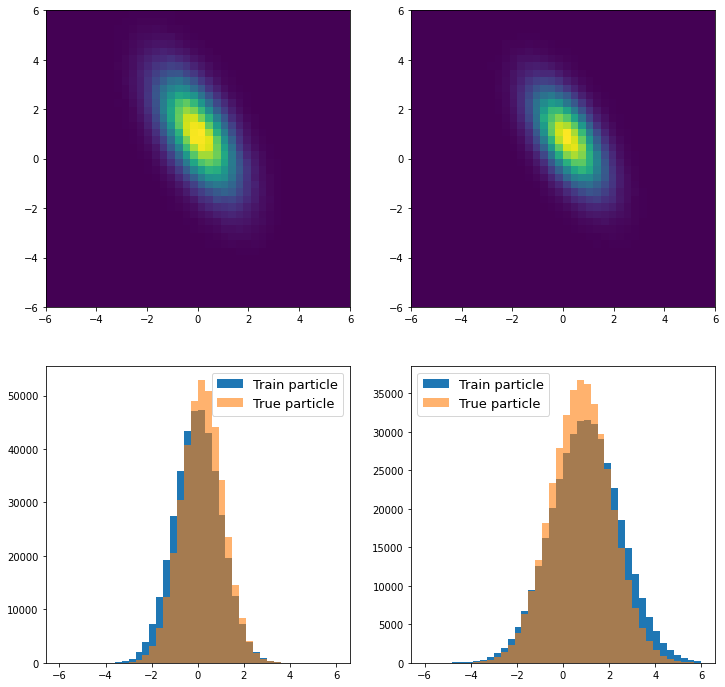

In [4]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [5]:
train_diff = train_det_pts - train_pts

In [6]:
diff_cov = np.cov( train_diff.T )

In [7]:
diff_cov

array([[2.49388425e-01, 1.40193391e-04],
       [1.40193391e-04, 6.40639767e-01]])

In [8]:
np.sqrt(diff_cov[0,0])

0.4993880502756258

In [9]:
np.sqrt(diff_cov[1,1])

0.800399754667403

<function matplotlib.pyplot.show(close=None, block=None)>

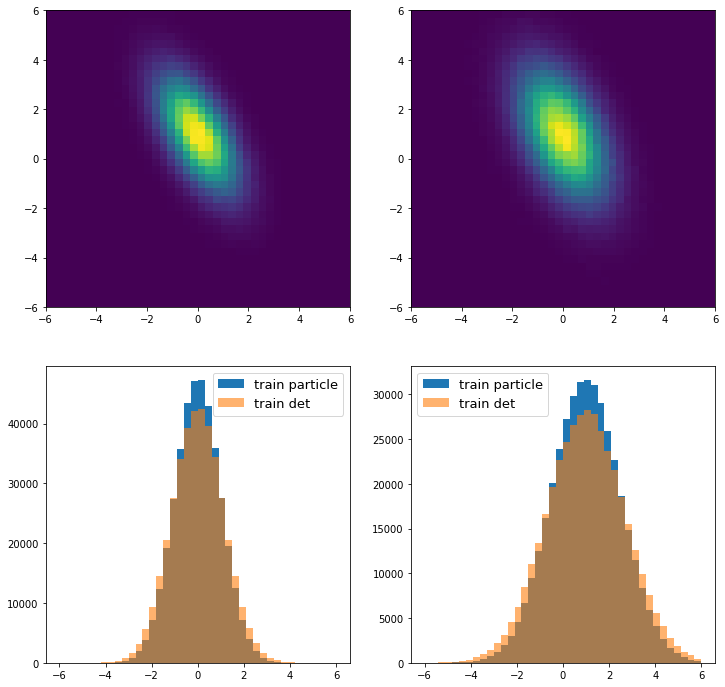

In [10]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

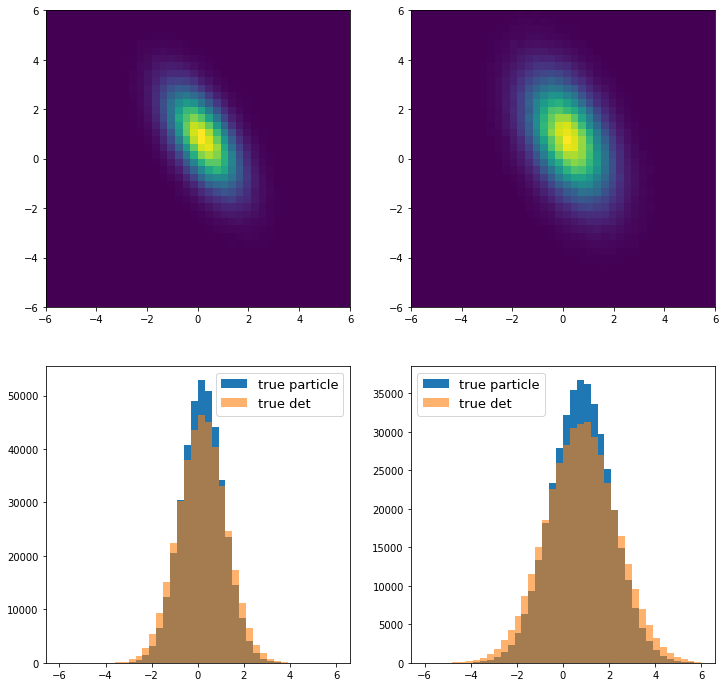

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

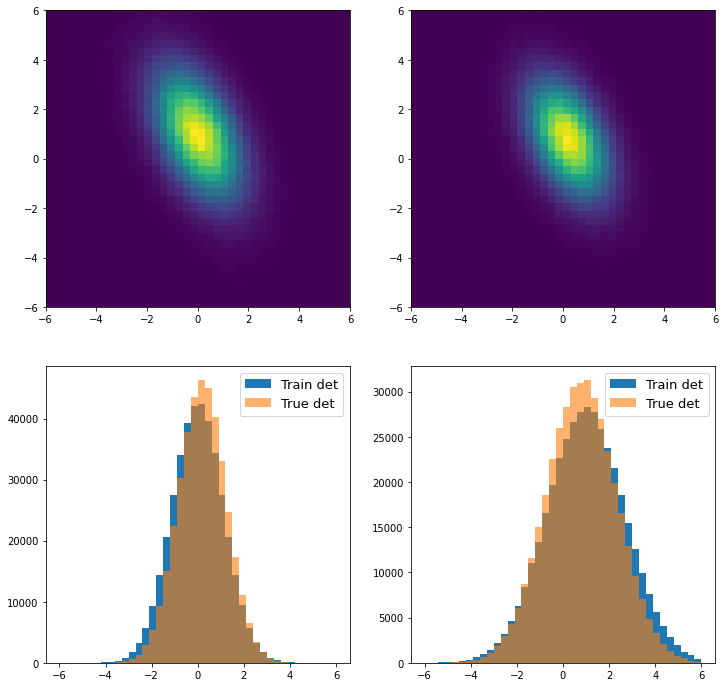

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [13]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

## Package the training data for OmniFold

In [14]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [15]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)




  shape of theta0_S : (400000, 2)
  shape of theta_unknown_S : (400000, 2)
  shape of xvals_1 :  (800000, 2)



  shape of labels0 : (400000,)
  shape of labels_unknown : (400000,)
  shape of yvals_1 :  (800000,)



  shape of theta0_G : (400000, 2)
  shape of xvals_2 :  (800000, 2)
  shape of yvals_2 :  (800000,)




ITERATION: 1

   -- ITERATION 1  STEP 1



/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Epoch 1/20
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
60/60 [==============================] - 14s 12ms/step - loss: 0.6889 - accuracy: 0.5105 - val_loss: 0.6852 - val_accuracy: 0.5663
Epoch 2/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6854 - accuracy: 0.5719 - val_loss: 0.6850 - val_accuracy: 0.5868
Epoch 3/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.5815 - val_loss: 0.6849 - val_accuracy: 0.5919
Epoch 4/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.5847 - val_loss: 0.6849 - val_accuracy: 0.5748
Epoch 5/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.5844 - val_loss: 0.6851 - val_accuracy: 0.5641
Epoch 6/20
60/60 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5819 - val_loss: 0.6851 - val_accuracy: 0.5639
Epoch 7/20
60/60 [==

Epoch 16/20
60/60 [==============================] - 0s 8ms/step - loss: 0.6893 - accuracy: 0.4374 - val_loss: 0.6900 - val_accuracy: 0.4408
Epoch 17/20
60/60 [==============================] - 1s 8ms/step - loss: 0.6891 - accuracy: 0.4385 - val_loss: 0.6900 - val_accuracy: 0.4311
Epoch 18/20
60/60 [==============================] - 0s 8ms/step - loss: 0.6892 - accuracy: 0.4331 - val_loss: 0.6900 - val_accuracy: 0.4402
Epoch 19/20
60/60 [==============================] - 0s 8ms/step - loss: 0.6895 - accuracy: 0.4369 - val_loss: 0.6900 - val_accuracy: 0.4335
Epoch 20/20
60/60 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.4365 - val_loss: 0.6900 - val_accuracy: 0.4413

   -- ITERATION 2  STEP 2

Epoch 1/20
300/300 [==============================] - 2s 3ms/step - loss: 0.6873 - accuracy: 0.3956 - val_loss: 0.6866 - val_accuracy: 0.4073
Epoch 2/20
300/300 [==============================] - 1s 2ms/step - loss: 0.6862 - accuracy: 0.4014 - val_loss: 0.6866 - val_

300/300 [==============================] - 3s 10ms/step - loss: 0.6830 - accuracy: 0.3929 - val_loss: 0.6830 - val_accuracy: 0.3901
Epoch 14/20
300/300 [==============================] - 3s 9ms/step - loss: 0.6828 - accuracy: 0.3933 - val_loss: 0.6830 - val_accuracy: 0.3935
Epoch 15/20
300/300 [==============================] - 2s 8ms/step - loss: 0.6829 - accuracy: 0.3939 - val_loss: 0.6830 - val_accuracy: 0.3884
Epoch 16/20
300/300 [==============================] - 2s 8ms/step - loss: 0.6829 - accuracy: 0.3917 - val_loss: 0.6830 - val_accuracy: 0.3957
Epoch 17/20
300/300 [==============================] - 2s 7ms/step - loss: 0.6833 - accuracy: 0.3936 - val_loss: 0.6831 - val_accuracy: 0.3877
Epoch 18/20
300/300 [==============================] - 2s 7ms/step - loss: 0.6829 - accuracy: 0.3918 - val_loss: 0.6830 - val_accuracy: 0.3910
Epoch 19/20
300/300 [==============================] - 2s 6ms/step - loss: 0.6827 - accuracy: 0.3929 - val_loss: 0.6830 - val_accuracy: 0.3902
Epoch 20/2

In [16]:
of_weights

array([[[1.11479044, 1.30260956, 1.13340223, ..., 0.74867332,
         0.65539461, 0.75083464],
        [1.19548476, 1.21731055, 1.04663372, ..., 0.60112399,
         0.68733406, 0.84291822]],

       [[1.00737035, 1.09588552, 1.08994043, ..., 0.99576396,
         0.9786101 , 0.99487478],
        [1.26572204, 1.29810715, 1.09581459, ..., 0.59680903,
         0.67914951, 0.86517793]],

       [[0.99420613, 1.03422034, 1.03585935, ..., 0.98050243,
         0.98142606, 0.98292416],
        [1.29921663, 1.31627798, 1.11827731, ..., 0.58465588,
         0.6714325 , 0.85645473]],

       [[0.99061388, 1.01822424, 1.008232  , ..., 0.97661901,
         0.97800887, 0.97701055],
        [1.35892355, 1.37975466, 1.12118125, ..., 0.58897328,
         0.66333753, 0.85319632]]])

In [17]:
np.shape( of_weights)

(4, 2, 400000)

<function matplotlib.pyplot.show(close=None, block=None)>

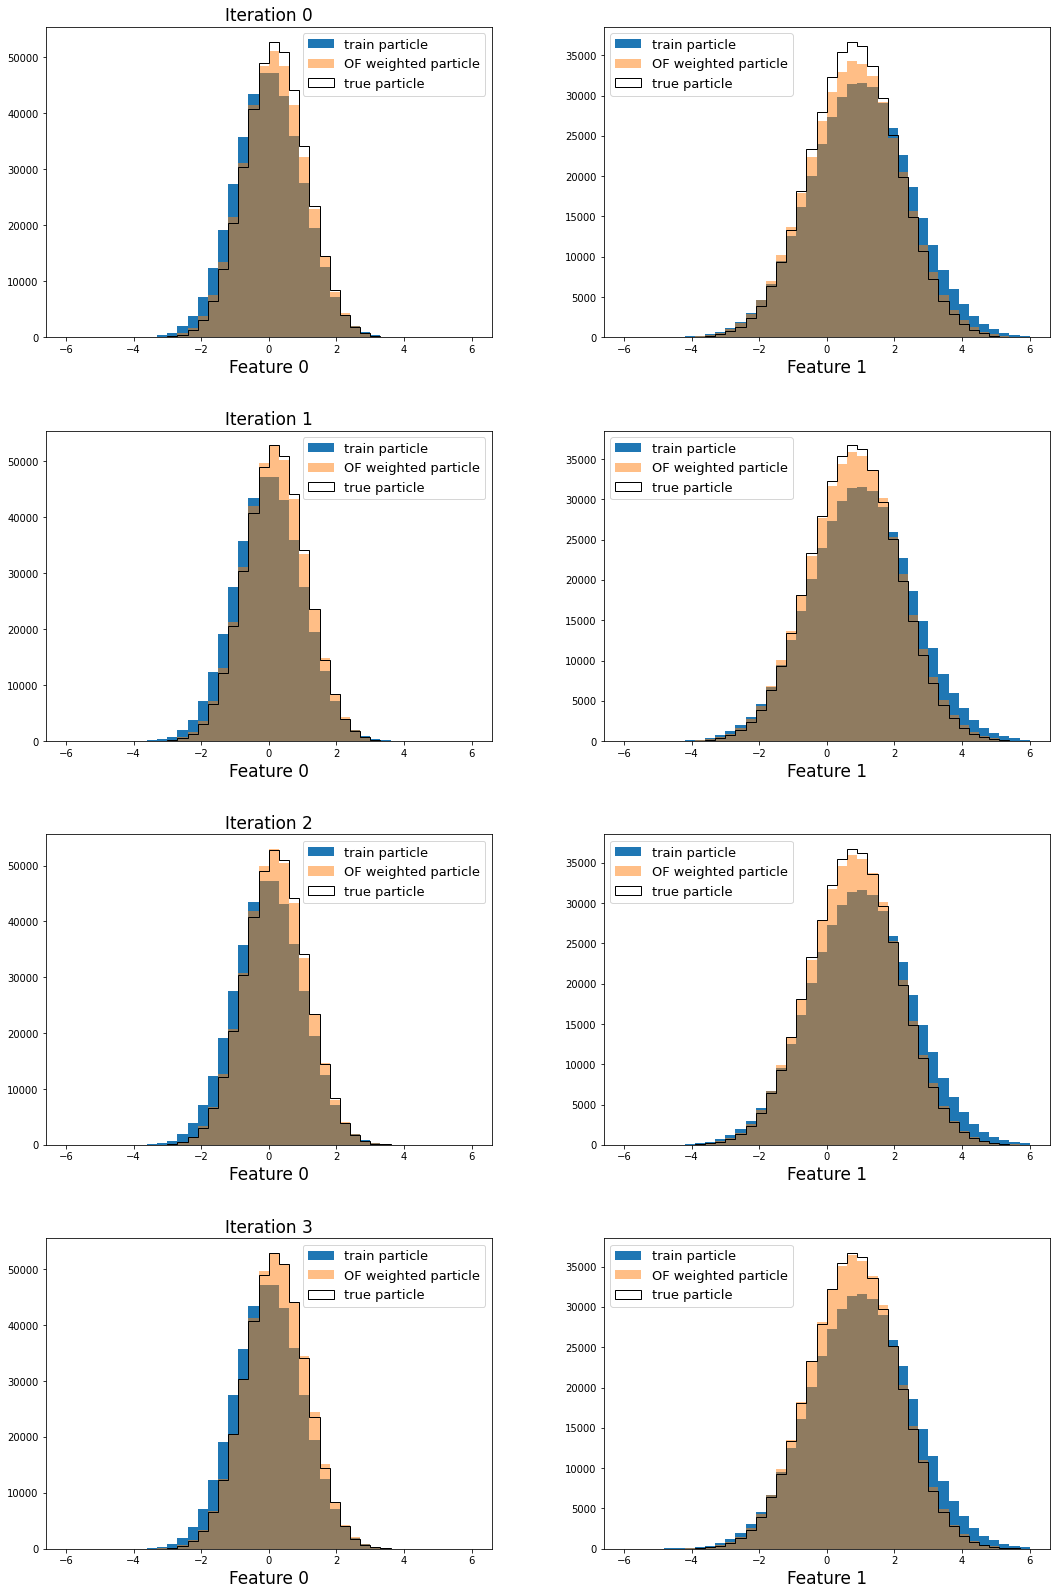

In [18]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

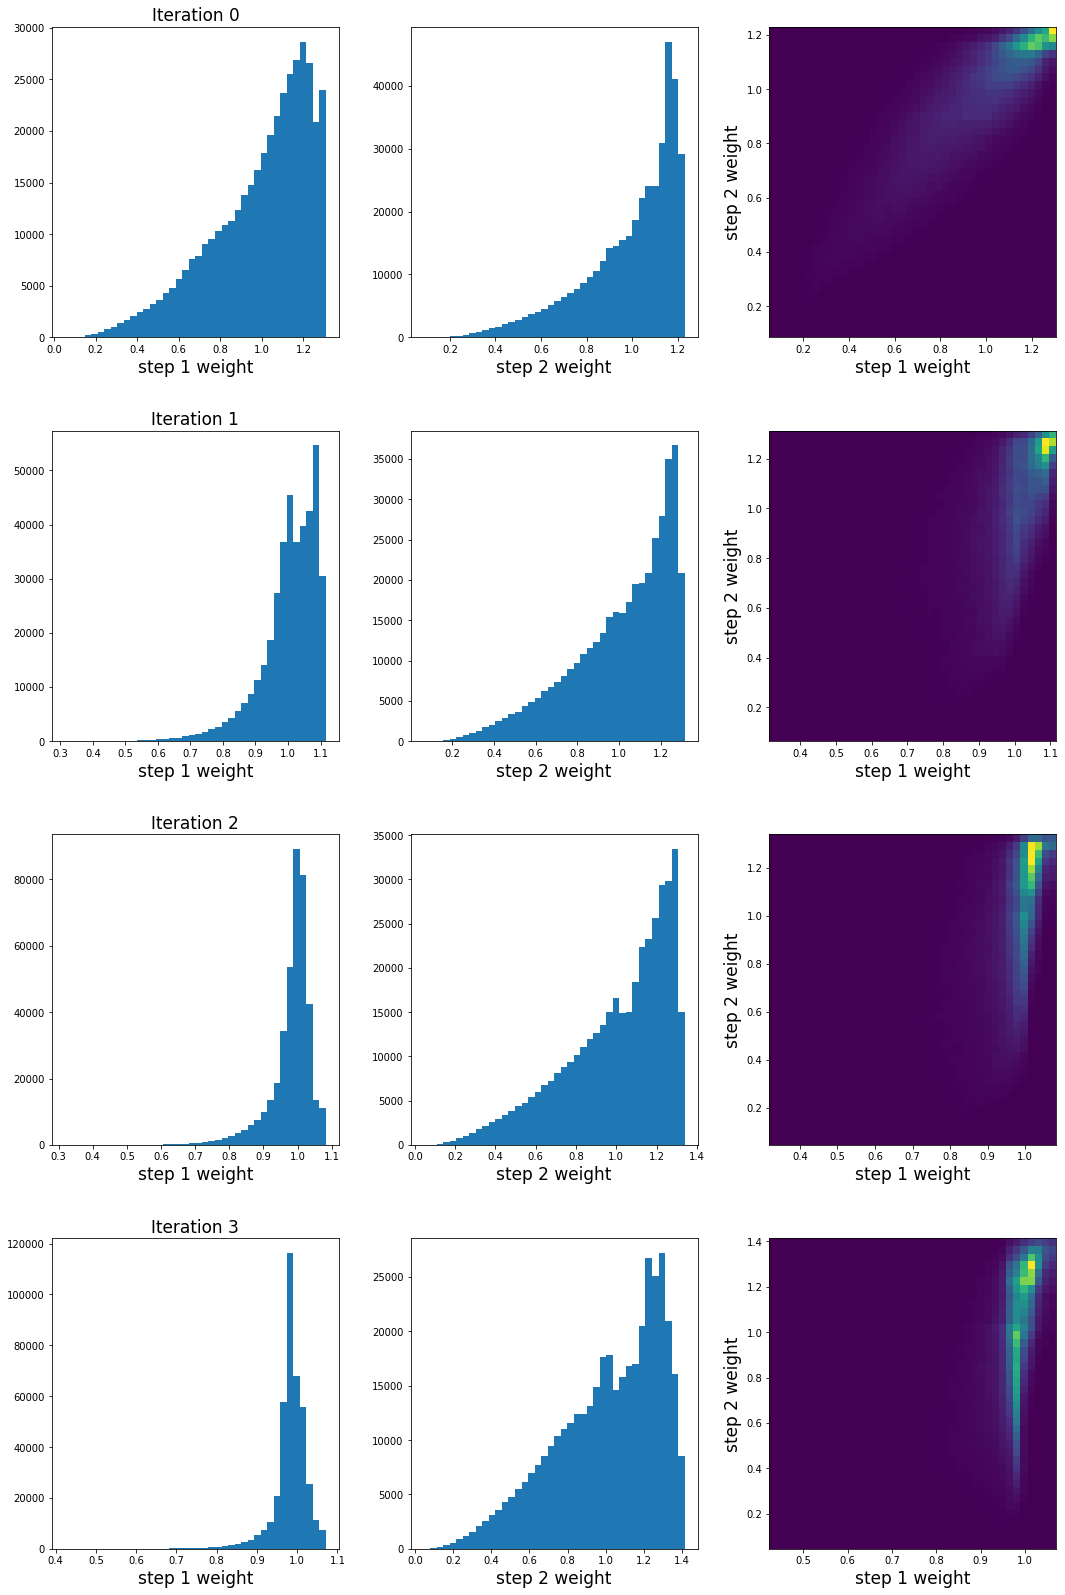

In [19]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

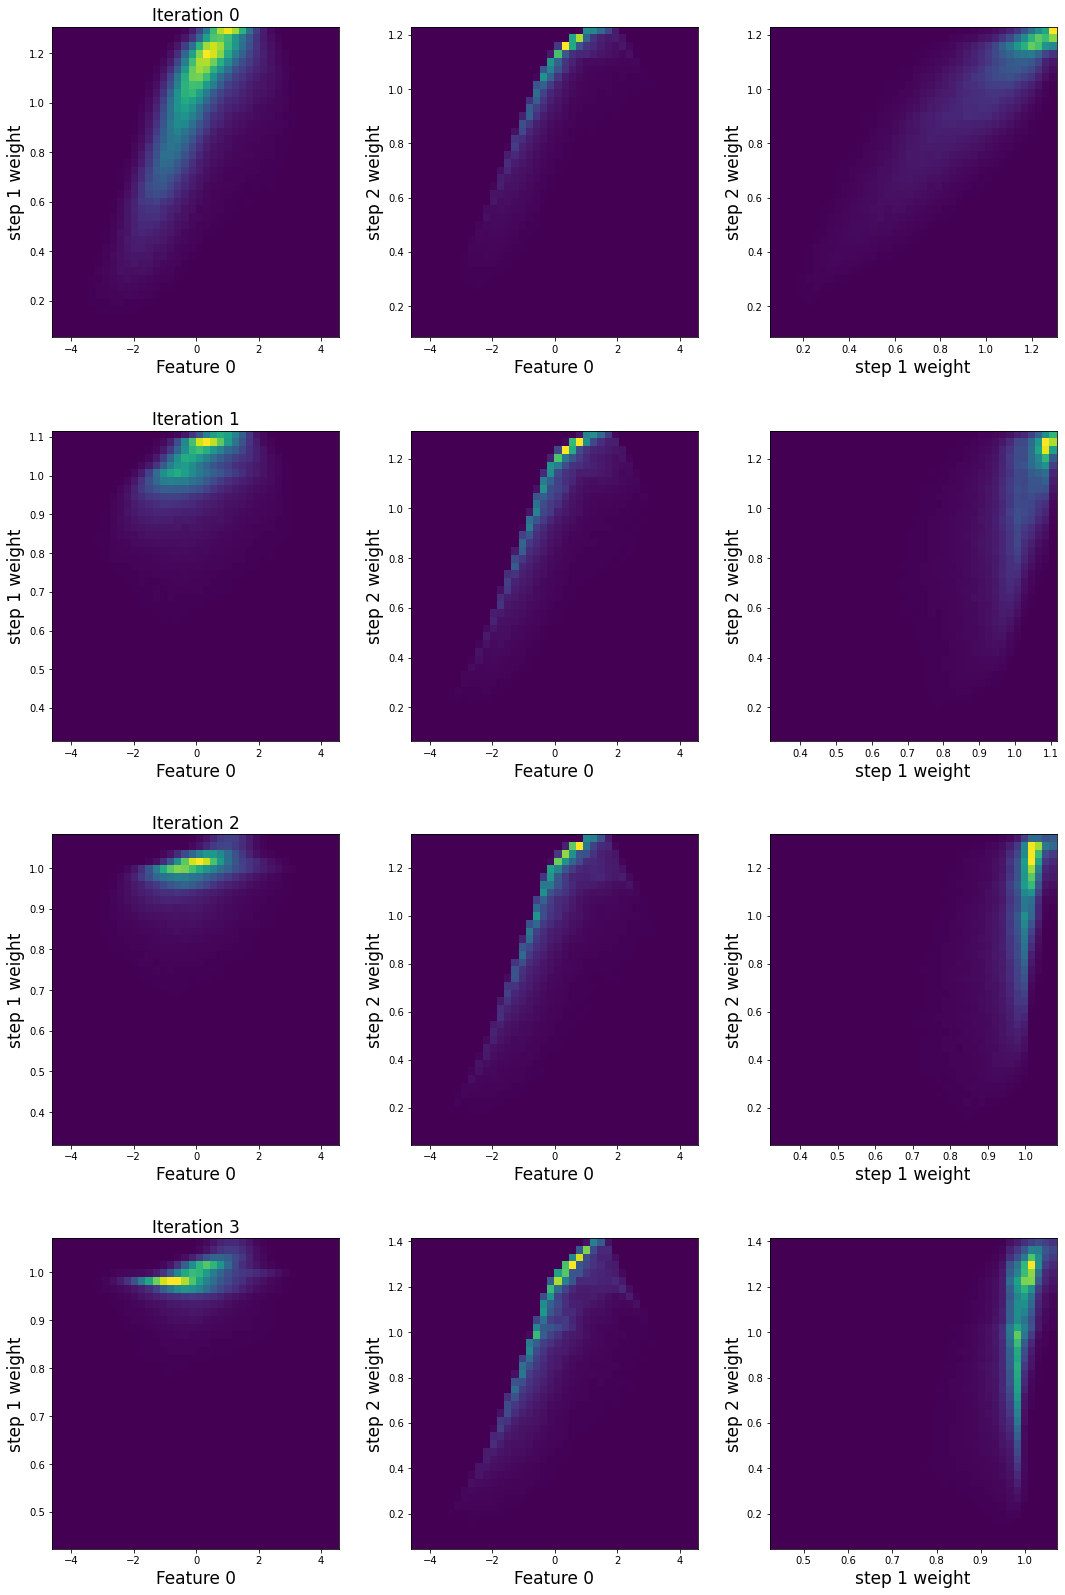

In [22]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,0], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,0], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

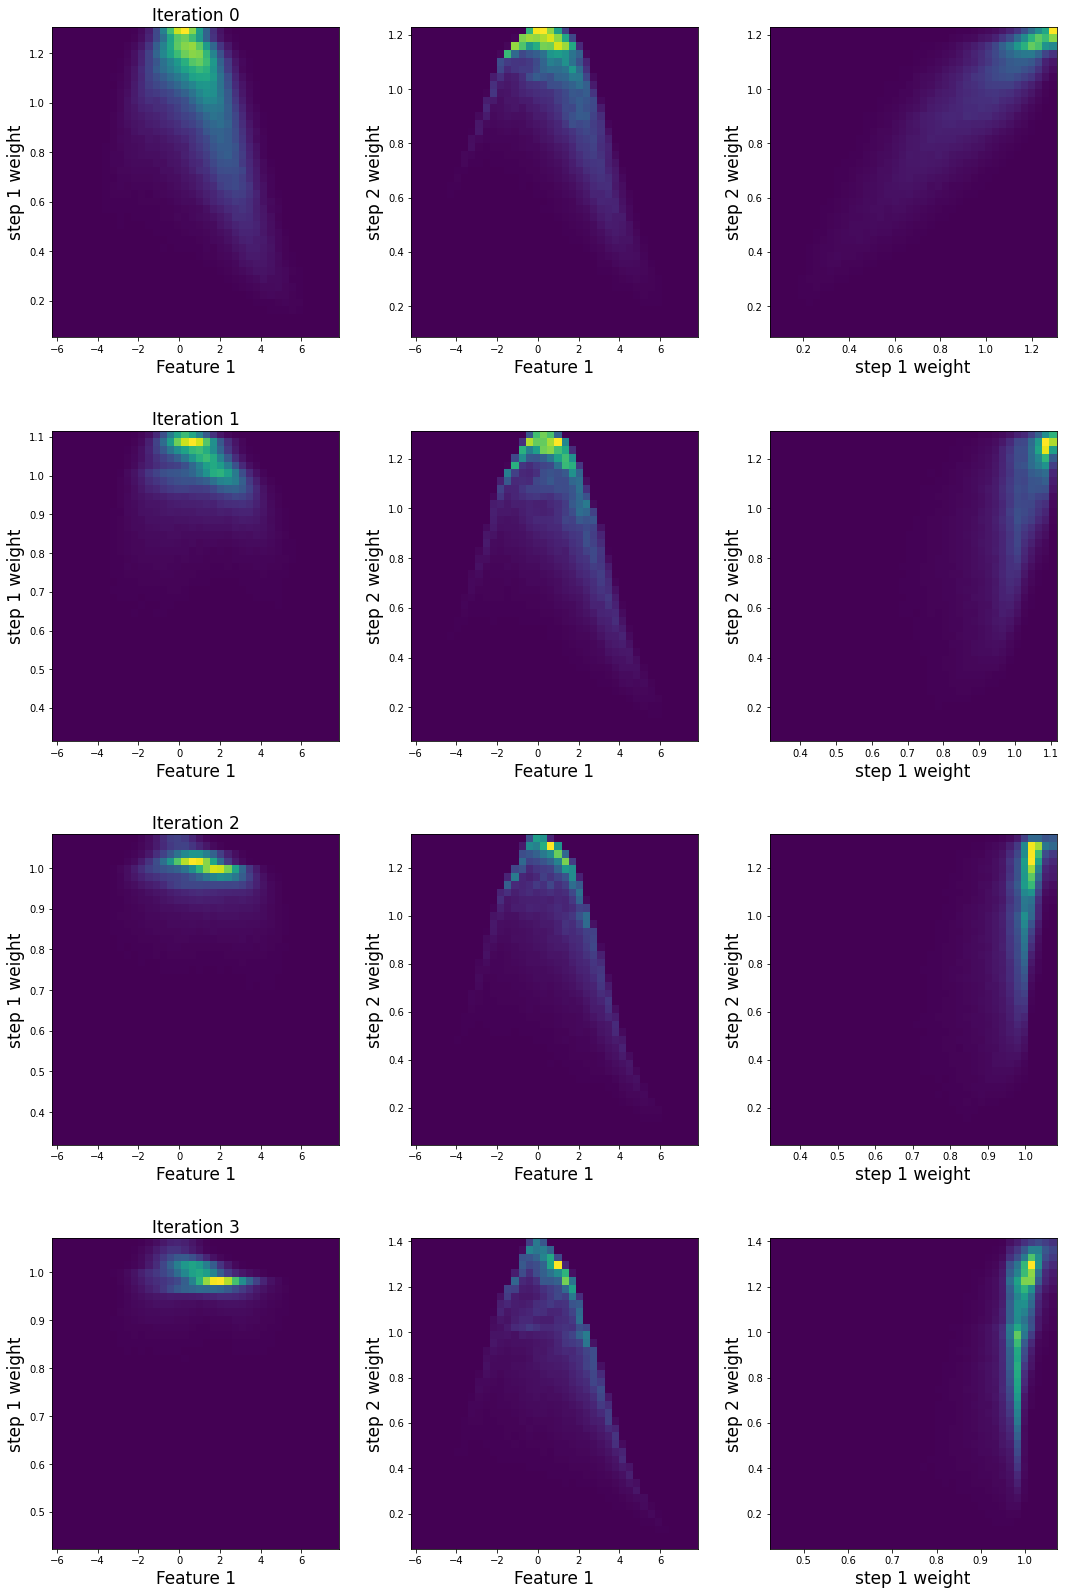

In [23]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,1], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,1], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

In [25]:
max_step2_weight = np.max( of_weights[3,1,:] )

<function matplotlib.pyplot.show(close=None, block=None)>

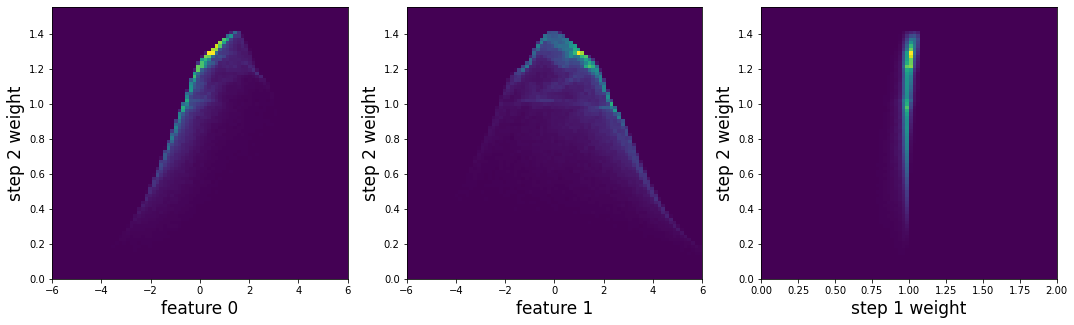

In [27]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))

hmin=-6
hmax=6
hbins=80

ax[0].hist2d( train_pts[:,0], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[1].hist2d( train_pts[:,1], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[2].hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[hbins,hbins], range=([0.,2.],[0.,1.1*max_step2_weight]))


lfontsize = 17

ax[0].set_xlabel( 'feature 0', fontsize=lfontsize )
ax[0].set_ylabel( 'step 2 weight', fontsize=lfontsize )


ax[1].set_xlabel( 'feature 1', fontsize=lfontsize )
ax[1].set_ylabel( 'step 2 weight', fontsize=lfontsize )

ax[2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
ax[2].set_ylabel( 'step 2 weight', fontsize=lfontsize )


plt.show
